## 0. Fashion dataset (*)
Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras.

a) Start visualizing some of the sample images

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import random
import pickle

In [6]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):
    
    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap="gray") #0-9 and all rows and columns
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

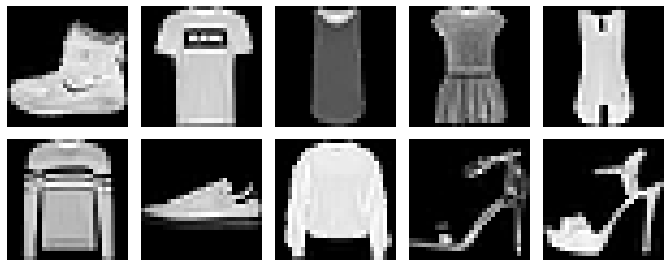

In [7]:
display_images(X_train)

b) Normalize the images to values between 0 and 1

In [8]:
X_train_norm = X_train.astype("float32")/255
X_test_norm = X_test.astype("float32")/255

In [20]:
X_train_norm.min(), X_train_norm.max(), X_test_norm.min(), X_train_norm.max()

(0.0, 1.0, 0.0, 1.0)

c) Visualize same images as before, do you see any difference?

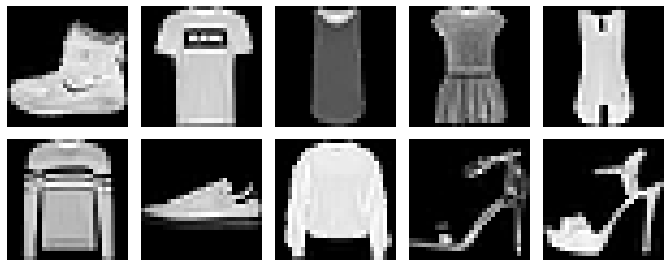

In [22]:
display_images(X_train_norm)

They look the same. 

d) Make histogram of a sample image before and after normalization. What do you notice?

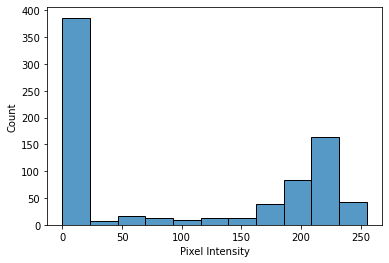

In [9]:
sns.histplot(X_train[0,:,:].flatten()).set(xlabel="Pixel Intensity");

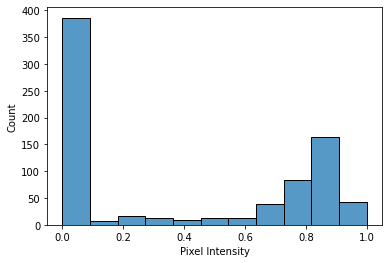

In [10]:
sns.histplot(X_train_norm[0,:,:].flatten()).set(xlabel="Pixel Intensity");

They are the same, except that the range before normalisation is 0 to 255 and after normalisation 0 to 1. 

e) Check if the dataset is balanced.

In [35]:
unique, counts = np.unique(y_train, return_counts=True)
occurences = dict(zip(unique, counts))
occurences

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [36]:
unique, counts = np.unique(y_test, return_counts=True)
occurences = dict(zip(unique, counts))
occurences

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

The dataset is balanced. 

0	T-shirt/top <br>
1	Trouser <br>
2	Pullover <br>
3	Dress <br>
4	Coat <br>
5	Sandal <br>
6	Shirt <br>
7	Sneaker <br>
8	Bag <br>
9	Ankle boot <br>

## 1. MLP architecture (*)
As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this video and this blog article for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week.

See Kaggle.

## 2. Predict and evaluate (*)
Use the model you've chosen from 1. and train on all training data. Also add early stopping to further avoid overfitting. Predict on the test data and evaluate your model.

c) Create a folder through Python called Misclassified and save the misclassified images there.

In [37]:
with open('../data/incorrectly_classified_indexes.pickle', 'rb') as handle:
    incorrectly_classified_indexes = pickle.load(handle)

In [49]:
indexes = []
for category in incorrectly_classified_indexes:
    for index in category:
        indexes.append(index)
len(indexes)

1129

In [50]:
incorrectly_classified_images = X_test[indexes]
incorrectly_classified_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 4, 1, ..., 1, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [59]:
import os
os.mkdir("../exercises/Misclassified")

In [60]:
np.save("Misclassified/incorrectly_classified_images", incorrectly_classified_images, allow_pickle=True)

In [61]:
with open("Misclassified/incorrectly_classified_images.npy", 'rb') as f:
    test = np.load(f)

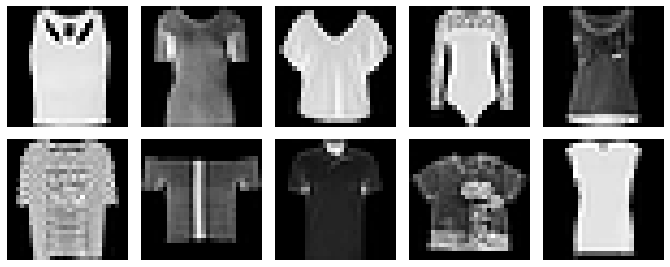

In [62]:
display_images(test)